In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
file = r'''/Users/aaronhxzhang/AARD/Data/OneHotEncodingCrashData.xlsx'''
data = pd.ExcelFile(file)
crash_df = data.parse('Sheet1')
print(list(crash_df))
print(crash_df.shape)

['Crash Number', 'Crash Date', 'Crash Time', 'Crash Hour', 'City/Town', 'Locality', 'Crash Severity', 'Maximum Injury Severity Reported', 'Number of NonFatal Injuries', 'Number of Fatal Injuries', 'Number of Vehicles', 'Manner of Collision', 'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known', 'Hit & Run', 'Road Surface', 'Ambient Light', 'Weather Condition', 'Traffic Way', 'Speed Limit', 'Roadway Intersection Type', 'Linked RI Number of Travel Lanes', 'Linked RI Street Operation', 'Linked RI Average Daily Traffic', 'Linked RI Year of ADT', 'X', 'Y', 'Road Segment ID', 'County']
(1064, 29)


In [3]:
crash_df = crash_df.drop(columns='Crash Time')
crash_df = crash_df.drop(columns='Crash Date')
crash_df = crash_df.drop(columns='Crash Number')

In [4]:
crash_df.sample(6)

,Crash Hour,City/Town,Locality,Crash Severity,Maximum Injury Severity Reported,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,...,Speed Limit,Roadway Intersection Type,Linked RI Number of Travel Lanes,Linked RI Street Operation,Linked RI Average Daily Traffic,Linked RI Year of ADT,X,Y,Road Segment ID,County
860,07:00PM to 07:59PM,ACTON,ACTON,Non-fatal injury,Non-fatal injury - Possible,1,0,2,Angle,21-24,...,40,T-intersection,2,Two-way traffic,3101.0,2013.0,206879.859128,915859.312382,1698,MIDDLESEX
596,12:00PM to 12:59PM,ACTON,ACTON,Property damage only (none injured),No injury,0,0,2,Not reported,35-44,...,0,Not reported,2,Two-way traffic,16445.0,2013.0,205420.900000,914968.500000,2119,MIDDLESEX
928,05:00PM to 05:59PM,ACTON,ACTON,Property damage only (none injured),No injury,0,0,2,Rear-end,21-24,...,45,Not at junction,2,Two-way traffic,36827.0,2009.0,205194.094520,913530.655802,2724,MIDDLESEX
804,08:00AM to 08:59AM,ACTON,ACTON,Non-fatal injury,Non-fatal injury - Non-incapacitating,2,0,2,Rear-end,25-34,...,35,Not at junction,2,Two-way traffic,16653.0,2013.0,203743.482783,911684.447652,1603,MIDDLESEX
944,12:00PM to 12:59PM,ACTON,ACTON,Property damage only (none injured),No injury,0,0,1,Single vehicle crash,65-74,...,45,Four-way intersection,2,Two-way traffic,36827.0,2009.0,204884.374966,913618.437372,2744,MIDDLESEX
222,06:00PM to 06:59PM,ACTON,ACTON,Property damage only (none injured),No injury,0,0,2,Angle,21-24,...,40,T-intersection,2,Two-way traffic,16407.0,2009.0,206771.250104,916360.937726,1513,MIDDLESEX


In [6]:
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '1', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '2', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '3', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '4', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '0', 'none', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries'].unique()

array(['none', '1+'], dtype=object)

In [7]:
def summarize_data(df):
    for column in df.columns:
            print(column)
            if df.dtypes[column] == np.object:    #categorical data
                print(df[column].value_counts())
            else:
                print (df[column].describe())
                
            print ('\n')
            
summarize_data(crash_df)


Crash Hour
03:00PM to 03:59PM    98
04:00PM to 04:59PM    97
06:00PM to 06:59PM    96
05:00PM to 05:59PM    87
02:00PM to 02:59PM    72
12:00PM to 12:59PM    71
08:00AM to 08:59AM    71
11:00AM to 11:59AM    68
01:00PM to 01:59PM    63
09:00AM to 09:59AM    53
07:00AM to 07:59AM    52
10:00AM to 10:59AM    49
07:00PM to 07:59PM    48
06:00AM to 06:59AM    35
09:00PM to 09:59PM    23
11:00PM to 11:59PM    17
08:00PM to 08:59PM    15
10:00PM to 10:59PM    14
05:00AM to 05:59AM    12
03:00AM to 03:59AM     5
01:00AM to 01:59AM     5
12:00AM to 12:59AM     5
04:00AM to 04:59AM     4
02:00AM to 02:59AM     4
Name: Crash Hour, dtype: int64


City/Town
ACTON    1064
Name: City/Town, dtype: int64


Locality
ACTON    1064
Name: Locality, dtype: int64


Crash Severity
Property damage only (none injured)    794
Non-fatal injury                       240
Not Reported                            21
Unknown                                  5
Fatal injury                             4
Name: Crash Seve

# Encode the Categorical Features as Numbers

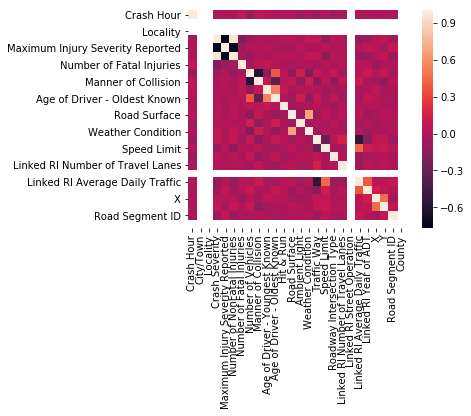

,Crash Hour,City/Town,Locality,Crash Severity,Maximum Injury Severity Reported,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,...,Speed Limit,Roadway Intersection Type,Linked RI Number of Travel Lanes,Linked RI Street Operation,Linked RI Average Daily Traffic,Linked RI Year of ADT,X,Y,Road Segment ID,County
1054,18,0,0,0,0,1,1,1,7,5,...,45,6,2,0,34428.0,2013.0,204522.887657,913691.604952,2088,0
1055,1,0,0,1,3,0,0,1,7,1,...,55,3,2,0,34428.0,2013.0,204081.287221,914428.230141,1931,0
1056,7,0,0,3,1,1,0,2,0,1,...,55,3,2,0,34428.0,2013.0,204081.287221,914428.230141,1931,0
1057,23,0,0,1,4,0,0,2,3,2,...,0,3,2,0,16653.0,2013.0,203576.882496,912689.934319,2047,0
1058,23,0,0,3,1,1,0,1,7,1,...,55,3,2,0,34428.0,2013.0,204081.287221,914428.230141,1931,0
1059,11,0,0,3,1,1,0,1,0,4,...,30,3,2,0,16445.0,2013.0,204122.810774,914072.800878,2135,0
1060,7,0,0,3,1,1,0,2,5,4,...,35,3,2,0,16445.0,2013.0,204122.810774,914072.800878,2135,0
1061,11,0,0,3,1,1,0,2,3,3,...,0,6,2,0,16445.0,2013.0,204235.694467,914162.119339,2086,0
1062,3,0,0,3,1,1,0,3,3,0,...,30,8,2,0,3129.0,2013.0,204151.906229,914565.124861,2083,0
1063,3,0,0,3,1,1,0,2,6,1,...,0,3,2,0,34428.0,2013.0,204193.260625,914213.222535,1931,0


In [8]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

#Calculate the correlation and plot it
encoded_data, _ = number_encode_features(crash_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(10)

In [9]:
#Strong correlation between oldest driver and manner of collision shown by heatmap
crash_df[["Age of Driver - Oldest Known", "Manner of Collision"]].head(10)

,Age of Driver - Oldest Known,Manner of Collision
0,16-20,Single vehicle crash
1,45-54,Angle
2,45-54,Single vehicle crash
3,25-34,Single vehicle crash
4,25-34,Unknown
5,65-74,"Sideswipe, same direction"
6,65-74,Rear-end
7,35-44,Angle
8,25-34,Single vehicle crash
9,25-34,Single vehicle crash


In [10]:
#Explore strong correlation between weather condition and road surface
crash_df[["Weather Condition", "Road Surface"]].head(10)

,Weather Condition,Road Surface
0,Clear/Clear,Wet
1,Rain/Cloudy,Wet
2,Not Reported,Dry
3,Snow/Snow,Snow
4,Clear,Dry
5,Clear/Clear,Dry
6,Clear,Dry
7,Snow,Snow
8,Snow/Cloudy,Snow
9,Snow/Cloudy,Snow


In [11]:
#Looks kind of like the same data, however weather condition looks like it would produce more predictive data since it has more specific categories
#We will delete this later if we need to

In [12]:
encoded_data, encoders = number_encode_features(crash_df)
new_series = encoded_data["Number of NonFatal Injuries"]

In [20]:
#Split and scale the data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns.drop("Number of NonFatal Injuries")], new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# Begin Logistic Regression

In [21]:
cls = linear_model.LogisticRegression()

cls.fit = (X_train, y_train)


In [22]:
y_pred = cls.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet